In [1]:
# Imports

import pandas as pd
import numpy as np
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [106]:
# Sentiment Analysis imports

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [4]:
# Import the data

train = pd.read_csv('../data/train.csv', encoding='utf-8')

In [5]:
train.head()

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1


In [6]:
train.isnull().sum()

tweet_id     0
tweet        1
sentiment    0
dtype: int64

In [7]:
train.dropna(inplace=True)

In [8]:
train.isnull().sum()

tweet_id     0
tweet        0
sentiment    0
dtype: int64

In [9]:
# Delete ItemID

#train.drop('ItemID', axis=1, inplace=True)

In [10]:
train.head()

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1


In [11]:
import re
from string import punctuation

In [12]:
train['tweet']

0       #sxswnui #sxsw #apple defining language of tou...
1       Learning ab Google doodles! All doodles should...
2       one of the most in-your-face ex. of stealing t...
3       This iPhone #SXSW app would b pretty awesome i...
4       Line outside the Apple store in Austin waiting...
5       #technews One lone dude awaits iPad 2 at Apple...
6       SXSW Tips, Prince, NPR Videos, Toy Shopping Wi...
7       NU user RT @mention New #UberSocial for #iPhon...
8          Free #SXSW sampler on iTunes {link} #FreeMusic
9       I think I might go all weekend without seeing ...
10      RT @mention Official #SXSW App Û÷SXSW GOÛª b...
11      It's official! I'm buying an iPad. #SXSW #elevate
12      They're giving away iPad 2's, x boxes and book...
13      RT @mention We're officially at #SXSW! Come by...
14      #Companies to watch, from the #SXSW trade show...
15      RT @mention Google Marissa Mayer, future of lo...
16      DL the #Calyp App to get into #Calyp Casa at #...
17      Well y

In [13]:
all_sentiments1 = '\n'.join(train['tweet'])

In [101]:
# all_sentiments1

In [15]:
def remove_hash(text):
    hash_pat = r'#'
    return re.sub(hash_pat, ' ', text)
def remove_mention(text):
    mention_pat = r'@mention|@[a-z]+'
    return re.sub(mention_pat, ' ', text, flags=re.I)
def remove_short_link(text):
    short_link_pat = r"bit\.ly/[a-z0-9/\-:\.=%;,\+\*())&\$!@\[\]#\?~_\.']*"
    return re.sub(short_link_pat, ' ', text, flags=re.I) 
def remove_http_link(text):
    link_permit = r"[a-z0-9/\-:\.=%;,\+\*())&\$!@\[\]#\?~_\.']"
    http_link_pat = r"http[s]?://"+link_permit+"+|//"+link_permit+"+|[\w\.]+\.[a-z]+/"+link_permit+"+" 
    return re.sub(http_link_pat, ' ', text, flags=re.I)
def remove_sub_link(text):
    link_pat = r'{link}'
    return re.sub(link_pat, ' ', text, flags=re.I)
def remove_html_char(text):
    html_char_pat = r'&[a-z]+;'
    return re.sub(html_char_pat, ' ', text, flags=re.I)    
def remove_date(text):
    pipe = r'|'
    date_pat_mon = str()
    months =   [r'January',
                r'February',
                r'March',
                r'April',
                r'May',
                r'June',
                r'July',
                r'August',
                r'September',
                r'October',
                r'November',
                r'December']
    for month in months:
        date_pat_mon = date_pat_mon + month+r' \d\d, \d\d\d\d|'
        date_pat_mon = date_pat_mon + month[:3]+r' \d\d, \d\d\d\d|'
    date_pat_mon = date_pat_mon[:-1]
#     date_pat_mon
    date_pat =  r'\d\d/\d\d/\d\d\d\d|\d\d/\d\d/\d\d' + pipe + \
                r'\d\d\.\d\d\.\d\d\d\d|\d\d\.\d\d\.\d\d' + pipe + \
                r'\d\d-\d\d-\d\d\d\d|\d\d-\d\d-\d\d' + pipe + \
                r'{}'.format(date_pat_mon)
    date_pat = r'{}'.format(date_pat)
    return re.sub(date_pat, ' ', text, flags=re.I)
def remove_short_date(text):
    pipe = r'|'
    short_date_pat = r'[\d]?\d/\d\d[\d\d]?' + pipe + r'[\d]?\d\.\d\d[\d\d]?'
    short_date_pat = r'{}'.format(short_date_pat)
    return re.sub(short_date_pat, ' ', text)
def remove_time(text):
    pipe = r'|'
    time_pat =  r'\d\d:\d\d:\d\d[ ]?pm'+pipe+\
                r'\d\d:\d\d:\d\d[ ]?am'+pipe+\
                r'\d\d:\d\d:\d\d'+pipe+\
                r'\d\d:\d\d:\d\d'+pipe+\
                r'[\d]?\d:\d\d[ ]?pm'+pipe+\
                r'[\d]?\d:\d\d[ ]?am'+pipe+\
                r'[\d]?\d:\d\d'+pipe+\
                r'[\d]?\d:\d\d'+pipe+\
                r'[\d]?\d.\d\d[ ]?pm'+pipe+\
                r'[\d]?\d.\d\d[ ]?am'+pipe+\
                r'[\d]?\d.\d\d'+pipe+\
                r'[\d]?\d.\d\d'
    time_pat= r'{}'.format(time_pat)
    return re.sub(time_pat,' ', text, flags=re.I)

def remove_sxsw(text):
    sxsw_pat = r"sxsw[a-z]*"
    return re.sub(sxsw_pat, ' ', text, flags=re.I) 

def remove_austin_texas(text):
    austin_pat = r"austin"
    texas_pat = r"texas|tx"
    temp = text
    temp = re.sub(austin_pat, ' ', temp, flags=re.I) 
    temp = re.sub(texas_pat, ' ', temp, flags=re.I) 
    return temp
def remove_punctuation(text):
    punctuation_pat_s = r'\'s'
    punctuation_pat_t = r'\'t'
    punctuation_pat_d = r'\'d'
    punctuation_pat_ve = r'\'ve'
    punctuation_pat_ll = r'\'ll'
    temp = text
    temp = re.sub(punctuation_pat_s, ' ', temp, flags=re.I)
    temp = re.sub(punctuation_pat_t, 't', temp, flags=re.I)
    temp = re.sub(punctuation_pat_d, ' would', temp, flags=re.I)
    temp = re.sub(punctuation_pat_ve, ' have', temp, flags=re.I)
    temp = re.sub(punctuation_pat_ll, ' will', temp, flags=re.I)
    return temp
def remove_rt(text):
    rt_pat = r'RT'
    return re.sub(rt_pat, ' ', text)


def remove_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return re.sub(emoji_pattern,'', text)
def remove_not_alnum(text):
    """
    remove everything that is not alpha numeric
    """
    only_text = r'[^a-z0-9 ]'
    return re.sub(only_text, ' ', text, flags=re.I)  



In [16]:
def clean_text(text):
    #replace links witn {link}
    text = remove_short_link(text)
    text = remove_http_link(text)
    #remove {link}
    text = remove_sub_link(text)
    #hash
    text = remove_hash(text)
    #mention
    text = remove_mention(text)
    #rt
    text = remove_rt(text)
    #html spl chars
    text = remove_html_char(text)
    #time
    text = remove_time(text)
    #svxm
    text=remove_sxsw(text)
    #texas
    text=remove_austin_texas(text)
    #date
    text = remove_date(text)
    text = remove_short_date(text)
    #punctuation
    text = remove_punctuation(text)
    #emotjis
    text = remove_emojis(text)
    #remove spl chars
    text = remove_not_alnum(text)
    #return lower
    return text.lower()

In [102]:
# '''

# def performCleansingForSentimentalAnalysisWithStopWords(completeText):
# #     print('##### Get Tokens in Lower Case #######')
# #     #Get tokens in lower case
# #     lowercasetokens = getUniqueTokens(completeText.lower())
# #     unique_lowercase_tokens = len(set(lowercasetokens))
# #     print('Lowercase Unique Tokens are ' + format(unique_lowercase_tokens))
# #     print('##### Applying  stemming #######')
# #     #Applying the stemming
# #     unique_lowercase_tokens_stemmed= stemData(lowercasetokens)
# #     len_unique_lowercase_tokens_stemmed = len(unique_lowercase_tokens_stemmed)
# #     print('Lowercase Unique Tokens after steming  ' + format(len_unique_lowercase_tokens_stemmed))
# #     print('##### Applying stop words + removing Hashtags + mentions + Links + Short Links +  #######')
#  #   hashtags = find_hashtags(lowercompleteText)
#  #    mentions = find_mentions(lowercompleteText)
#  #   links = find_links(lowercompleteText)
# #    numbers = find_numbers(lowercompleteText)
# #    emojis = find_emojis(lowercompleteText)
# #    punctuations = list(punctuation)
# #     unique_lowercase_tokens_stemmed_without_stopwords = removeCustomStopWords(lowercompleteText,hashtags,mentions,links,numbers,emojis,punctuations)
# #     return unique_lowercase_tokens_stemmed_without_stopwords
#     lowercompleteText = completeText.lower()
#     import re
#     hastag_pat = r'#[0-9a-z_]+'
#     mentions_pat = r'\@[0-9a-z]+'
#     number_pat = r'-?\d+\.?\d+|-?\d+'
#     links_pat= r'http://\S+|https://\S+'
#     punctuations_pat= r'[.!?\\-]'
#     #short_links_pat =
#     emoji_pattern = re.compile("["
#         u"\U0001F600-\U0001F64F"  # emoticons
#         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#         u"\U0001F680-\U0001F6FF"  # transport & map symbols
#         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#                            "]+", flags=re.UNICODE)
#     def remove_hashtags(tweet):
#         return re.sub(hastag_pat, '', tweet)
#     def remove_mentions(tweet):
#         return re.sub(mentions_pat, '', tweet)
#     def remove_numbers(tweet):
#         return re.sub(number_pat, '',tweet)
#     def remove_links(tweet):
#         return re.sub(links_pat, '', tweet)
#     def remove_emojis(tweet):
#         return re.sub(emoji_pattern, '', tweet)
#     def remove_shortLinks(tweet):
#         return re.sub(short_links_pat, '', tweet)
#     def remove_punctuations(tweet):
#         return re.sub(punctuations_pat, '', tweet)
#     def find_hashtags(tweet):
#         return re.findall(hastag_pat, tweet)
#     def find_mentions(tweet):
#         return re.findall(mentions_pat, tweet, flags=re.I)
#     def find_links(tweet):
#         return re.findall(links_pat, tweet, flags=re.I)
#     def find_numbers(tweet):
#         return re.findall(number_pat, tweet)
#     def find_emojis(tweet):
#         return re.findall(emoji_pattern, tweet)
    
          
#     lowercompleteText = remove_hashtags(lowercompleteText)
#     lowercompleteText = remove_mentions(lowercompleteText)
#     lowercompleteText = remove_numbers(lowercompleteText)
#     lowercompleteText = remove_links(lowercompleteText)
#     lowercompleteText = remove_emojis(lowercompleteText)
#     lowercompleteText = remove_punctuations(lowercompleteText)
#   #  lowercompleteText = getstemData(lowercompleteText)
#     return  lowercompleteText
#     '''

In [18]:
train['tweet'] = train['tweet'].apply(lambda x:clean_text(x))

In [19]:
train.isnull().sum()

tweet_id     0
tweet        0
sentiment    0
dtype: int64

In [20]:
all_sentiments = '\n'.join(train['tweet'])

In [103]:
# all_sentiments

In [22]:
all_sentiments[:50]

'       apple defining language of touch with diffe'

In [23]:
#nltk.download('stopwords')

In [24]:
#from nltk.corpus import stopwords
import nltk

from string import punctuation
from nltk.stem.porter import *
#punc = list(punctuation)

# tokenize
train['tokenized_text'] = [nltk.word_tokenize(x) for x in train['tweet']]


In [25]:
#train['tokenized_text'] = train['tokenized_text'].apply(lambda row: [word for word in row if word not in punc])

#train['tokenized_text'] = train['tokenized_text'].apply(lambda row: [word for word in row if word not in punc])

#train['tweet'] = train['tweet'].apply(lambda row: [word for word in row if word not in punc])

In [104]:
train['tokenized_text'].head(10)

0    [apple, defining, language, of, touch, with, d...
1    [learning, ab, google, doodles, all, doodles, ...
2    [one, of, the, most, in, your, face, ex, of, s...
3    [this, iphone, app, would, b, pretty, awesome,...
4    [line, outside, the, apple, store, in, waiting...
5    [technews, one, lone, dude, awaits, ipad, 2, a...
6    [tips, prince, npr, videos, toy, shopping, wit...
7    [nu, user, new, ubersocial, for, iphone, now, ...
8               [free, sampler, on, itunes, freemusic]
9    [i, think, i, might, go, all, weekend, without...
Name: tokenized_text, dtype: object

In [27]:
#stemmer = PorterStemmer()

#train['tokenized_text'] = train['tokenized_text'].apply(lambda x: [stemmer.stem(i) for i in x])
#train['tokenized_text'] = train['tokenized_text'].apply(lambda x: ' '.join(x))


In [89]:
train['tokenized_text'].head()

0    [apple, defining, language, of, touch, with, d...
1    [learning, ab, google, doodles, all, doodles, ...
2    [one, of, the, most, in, your, face, ex, of, s...
3    [this, iphone, app, would, b, pretty, awesome,...
4    [line, outside, the, apple, store, in, waiting...
Name: tokenized_text, dtype: object

In [29]:
X = train['tokenized_text']
y = train['sentiment']

In [30]:

from gensim.models import Word2Vec

#tokenized_tweet =train['tokenized_text'].apply(lambda x: x.split()) 

model_w2v = Word2Vec(train['tokenized_text'], size=200,  window=5)

In [31]:
model_w2v.wv.most_similar("ipad2")

[('temp', 0.9983035922050476),
 ('shop', 0.9979406595230103),
 ('congress', 0.9970568418502808),
 ('in', 0.9963889718055725),
 ('open', 0.9952287673950195),
 ('apple', 0.9932007789611816),
 ('popup', 0.9913644790649414),
 ('lined', 0.9909828901290894),
 ('up', 0.9905549883842468),
 ('set', 0.9903539419174194)]

In [32]:
# Function to average all word vectors in a paragraph
def featureVecMethod(words, model, num_features):
    # Pre-initialising empty numpy array for speed
    featureVec = np.zeros(num_features,dtype="float32")
    nwords = 0
    
    #Converting Index2Word which is a list to a set for better speed in the execution.
    index2word_set = set(model_w2v.wv.index2word)
    
    for word in  words:
        if word in index2word_set:
            nwords = nwords + 1
            featureVec = np.add(featureVec,model[word])
    
    # Dividing the result by number of words to get average
    featureVec = np.divide(featureVec, nwords)
    return featureVec

In [33]:
# Function for calculating the average feature vector
def getAvgFeatureVecs(reviews, model, num_features):
    counter = 0
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    for review in reviews:
        # Printing a status message every 1000th review
        if counter%1000 == 0:
            print("Review %d of %d"%(counter,len(reviews)))
            
        reviewFeatureVecs[counter] = featureVecMethod(review, model, num_features)
        counter = counter+1
        
    return reviewFeatureVecs

In [35]:
X = train['tokenized_text']
y = train['sentiment']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=10)

In [37]:
X_train.isnull().sum()

0

In [38]:
y_train.isnull().sum()

0

In [39]:
X_train.head()

6508    [google, maps, for, mobile, 5, 2, looks, awesome]
345     [ellen, page, appearance, reduced, to, iphone,...
5463    [watching, demo, of, google, hotpot, people, u...
5441    [a, delightful, reprieve, from, i, spot, somet...
5585    [hi, if, you, accidentally, took, my, ipad, fr...
Name: tokenized_text, dtype: object

In [105]:

# '''from gensim.models import Word2Vec

# tokenized_tweet =X_train.apply(lambda x: x.split()) 

# model_w2v = Word2Vec(tokenized_tweet, size=200,  window=5)'''

In [41]:
#tokenized_tweet

In [42]:
model_w2v.wv.most_similar("google")

[('circles', 0.9907634258270264),
 ('denies', 0.987661600112915),
 ('false', 0.9848948121070862),
 ('called', 0.9847586154937744),
 ('tries', 0.9841498136520386),
 ('possibly', 0.9820309281349182),
 ('today', 0.9808022975921631),
 ('announcing', 0.9802318811416626),
 ('launching', 0.9798178672790527),
 ('social', 0.9778090715408325)]

In [43]:
# Function to average all word vectors in a paragraph
def featureVecMethod(words, model, num_features):
    # Pre-initialising empty numpy array for speed
    featureVec = np.zeros(num_features,dtype="float64")
    nwords = 0
    
    #Converting Index2Word which is a list to a set for better speed in the execution.
    index2word_set = set(model_w2v.wv.index2word)
    
    for word in  words:
        if word in index2word_set:
            nwords = nwords + 1
            featureVec = np.add(featureVec,model[word])
    
    # Dividing the result by number of words to get average
    featureVec = np.divide(featureVec, nwords)
    return featureVec


In [44]:
# Function for calculating the average feature vector
def getAvgFeatureVecs(reviews, model, num_features):
    counter = 0
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float64")
    for review in reviews:
        # Printing a status message every 1000th review
        if counter%1000 == 0:
            print("Review %d of %d"%(counter,len(reviews)))
            
        reviewFeatureVecs[counter] = featureVecMethod(review, model, num_features)
        counter = counter+1
        
    return reviewFeatureVecs

In [45]:
# Calculating average feature vector for training set
num_features = 200
xtrainDataVecs = getAvgFeatureVecs(X_train, model_w2v, num_features)

Review 0 of 5818


/Users/Aniket/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]
/Users/Aniket/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


Review 1000 of 5818
Review 2000 of 5818
Review 3000 of 5818
Review 4000 of 5818
Review 5000 of 5818


In [93]:
pd.DataFrame(xtrainDataVecs).isnull().sum()

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
170    1
171    1
172    1
173    1
174    1
175    1
176    1
177    1
178    1
179    1
180    1
181    1
182    1
183    1
184    1
185    1
186    1
187    1
188    1
189    1
190    1
191    1
192    1
193    1
194    1
195    1
196    1
197    1
198    1
199    1
Length: 200, dtype: int64

In [98]:
xtrainDataVecs = pd.DataFrame(xtrainDataVecs).fillna(0)

In [ ]:
# np.where(x.values >= np.finfo(np.float64).max)


In [96]:
#pd.train['sentiment'].isnull()

In [99]:
# Fitting a random forest classifier to the training data
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 50)
    
print("Fitting random forest to training data....")    
forest.fit(xtrainDataVecs, y_train)
y_pred = forest.predict()
classification_report()

Fitting random forest to training data....


In [100]:
# xtrainDataVecs.isnull().sum()

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
170    0
171    0
172    0
173    0
174    0
175    0
176    0
177    0
178    0
179    0
180    0
181    0
182    0
183    0
184    0
185    0
186    0
187    0
188    0
189    0
190    0
191    0
192    0
193    0
194    0
195    0
196    0
197    0
198    0
199    0
Length: 200, dtype: int64

---

In [ ]:

test = pd.read_csv('test.csv', encoding='utf-8')

In [ ]:
test.head()

In [ ]:
test['tweet'] = test['tweet'].apply(lambda x:clean_text(x))

In [ ]:
test['tokenized_text'] = [nltk.word_tokenize(x) for x in test['tweet']]

In [ ]:
test['tokenized_text'] = test['tokenized_text'].apply(lambda x: ' '.join(x))


In [ ]:
test['tokenized_text'] 

In [ ]:
tokenized_tweet_test =test['tokenized_text'].apply(lambda x: x.split()) 

In [ ]:
testDataVecs = getAvgFeatureVecs(tokenized_tweet_test,  model_w2v, num_features)

In [ ]:
result = forest.predict(testDataVecs)
output = pd.DataFrame(data={"id":test["tweet_id"], "sentiment":result})
output.to_csv( "output.csv", index=False, quoting=3 )

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(train['tokenized_text']).toarray()
y = train['sentiment']

In [ ]:
all_words ='\n'.join([str(text) for text in train['tokenized_text']])
all_words
#all_words = '\n'.join(train['tokenized_text'])

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# all the tweets

# generate wordcloud object
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

# plot wordcloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

---

In [53]:
#tok = TreebankWordTokenizer()

In [54]:
# Find unique tokens

#unique_tokens = len(set(tok.tokenize(all_sentiments)))

#print(f'Unique unprocessed tokens - {unique_tokens}')

In [55]:
# Unique lower cased tokens

#unique_lower_case = [t.lower() for t in tok.tokenize(all_sentiments)]
#unique_lc_count = len(set(unique_lower_case))

#print(f'Unique lower case unprocessed tokens - {unique_lc_count}')

In [56]:
#ps = PorterStemmer()

In [57]:
# Unique lower cased stemmed tokens

#unique_lc_stemmed = [ps.stem(t) for t in unique_lower_case]
#unique_lc_stem_count = len(set(unique_lc_stemmed))

#print(f'Unique lower case stemmed tokens - {unique_lc_stem_count}')

In [58]:

# Load stop words

#stw = stopwords.words('english')

In [59]:
# Unique lower cased stemmed w/o stop wordstokens

#unique_lc_stem_wo_stpwrds = [t for t in unique_lc_stemmed if t not in stw]
#unique_lc_stem_wo_stw_count = len(set(unique_lc_stem_wo_stpwrds))

#print(f'Unique lower case stemmed tokens without stop words - {unique_lc_stem_wo_stw_count}')

In [60]:
# Create a word cloud

#wc = WordCloud(stopwords=stw, background_color='white', max_words=500).generate(all_sentiments.lower())

In [61]:
#%matplotlib inline
#plt.figure(figsize=(15, 10))
#plt.clf()
#plt.imshow(wc)
#plt.axis('off')
#plt.show()

## Sentiment Analysis

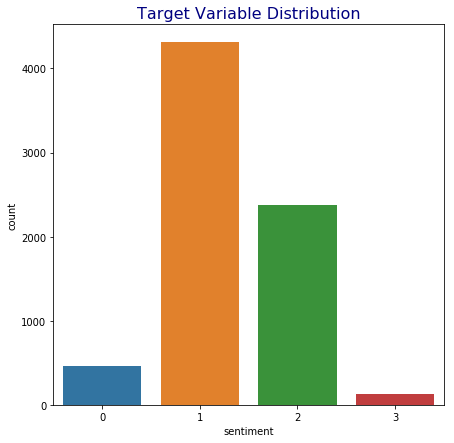

In [63]:
# Sentiment categories

plt.figure(figsize=(7, 7))
sns.countplot(train['sentiment'])
plt.title('Target Variable Distribution', fontsize=16, color='navy')
plt.show()

In [64]:
# Create X and Y
#train['tokenized_text'] = [nltk.word_tokenize(x) for x in train['tokenized_text']]

#X = train['tokenized_text']


In [65]:
X.head()

0    [apple, defining, language, of, touch, with, d...
1    [learning, ab, google, doodles, all, doodles, ...
2    [one, of, the, most, in, your, face, ex, of, s...
3    [this, iphone, app, would, b, pretty, awesome,...
4    [line, outside, the, apple, store, in, waiting...
Name: tokenized_text, dtype: object

In [66]:
#from imblearn.over_sampling import SMOTE


In [67]:
#sm=SMOTE(sampling_strategy=0.25,random_state=10)

In [68]:
y.value_counts(normalize=True)*100

1    59.260278
2    32.751272
0     6.269765
3     1.718686
Name: sentiment, dtype: float64

In [69]:
#X_res, y_res = sm.fit_resample(X, y)

In [70]:
X.head()

0    [apple, defining, language, of, touch, with, d...
1    [learning, ab, google, doodles, all, doodles, ...
2    [one, of, the, most, in, your, face, ex, of, s...
3    [this, iphone, app, would, b, pretty, awesome,...
4    [line, outside, the, apple, store, in, waiting...
Name: tokenized_text, dtype: object

In [71]:
y.head()

0    1
1    1
2    2
3    0
4    1
Name: sentiment, dtype: int64

In [72]:
# Split data in to train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=10)

In [90]:
X_train.head(10)

6508    [google, maps, for, mobile, 5, 2, looks, awesome]
345     [ellen, page, appearance, reduced, to, iphone,...
5463    [watching, demo, of, google, hotpot, people, u...
5441    [a, delightful, reprieve, from, i, spot, somet...
5585    [hi, if, you, accidentally, took, my, ipad, fr...
5103    [que, porque, google, to, launch, major, new, ...
3800    [yes, gowalla, wins, best, andoid, app, at, th...
6093    [quote, of, the, day, on, ipad, interface, des...
1402    [the, google, authenticator, app, for, mobile,...
6853    [apple, opening, downtown, pop, up, store, for...
Name: tokenized_text, dtype: object

In [74]:
#cv = CountVectorizer()

In [75]:
#X_train_vec = cv.fit_transform(X_train)

In [76]:
#from imblearn.over_sampling import RandomOverSampler


In [79]:
# Creating count vectorizer from training data



In [85]:
from sklearn import metrics
from xgboost import XGBClassifier


In [86]:
# Instantiate all the models

rf = RandomForestClassifier()
lr = LogisticRegression()
#gb = GradientBoostingClassifier()
xgb= XGBClassifier()

In [87]:
# Convert my test data into vectors for prediction

#X_test_vec = cv.transform(X_test)

In [88]:
# Train the models and check CLF report



for model, name in zip([rf, lr, xgb], ['Random Forest', 'Logistic Regression', 'xgboost']):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'CLF report for {name}')
    score = metrics.f1_score(y_test, y_pred,average='weighted')
    print(score)
    print(classification_report(y_test, y_pred))

ValueError: setting an array element with a sequence.

In [ ]:
from sklearn.naive_bayes import MultinomialNB

classifier=MultinomialNB(alpha=0.1)

In [ ]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.f1_score(y_test, y_pred,average='weighted')
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))
    print(classification_report(y_test, y_pred))

In [ ]:
tf = TfidfVectorizer()


In [ ]:
from sklearn import metrics


In [ ]:
X_train_vec_tf = tf.fit_transform(X_train)
X_test_vec_tf = tf.transform(X_test)

In [ ]:
# Train the models and check CLF report for TFIDF vectorizer

for model, name in zip([rf, lr, gb], ['Random Forest', 'Logistic Regression', 'Gradient Boosting']):
    model.fit(X_train_vec_tf, y_train)
    y_pred = model.predict(X_test_vec_tf)
    print(f'CLF report for {name}')
    score = metrics.f1_score(y_test,y_pred,average='weighted')
    print("f1 score:   %0.3f" % score)
    print(classification_report(y_test, y_pred))

## Cleaning with RE

**List of unwanted items**
1. Hashtags (#)
2. Mentions (@)
3. Links (http://, https://)
4. Short link (t.co, bit.ly)
5. Numbers
6. Emojis
7. Emoticons
8. Punctuations